----

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Para importar de manera correcta cada archivo .csv conviene llamar al metodo .info() y .head() en cada dataframe creado para tener una primera idea de como recibimos los datos y darnos cuenta si hay nulos, identificar tipos de datos y determinar los parametros que debemos usar en read_csv.

In [1]:
# importar librerías
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('instacart_orders.csv',header=0,sep= ';',keep_default_na=True) 
products = pd.read_csv('products.csv',header=0,sep= ';',keep_default_na=True) 
order_products = pd.read_csv('order_products.csv',header=0,sep= ';',keep_default_na=True)
aisles = pd.read_csv('aisles.csv',header=0,sep= ';',keep_default_na=True)
departments = pd.read_csv('departments.csv',header=0,sep= ';',keep_default_na=True)

In [3]:
# mostrar información del DataFrame
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
order_products.info()
order_products.head()
order_products.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [6]:
# mostrar información del DataFrame
aisles.info()
aisles.head()
aisles.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


aisle_id    0
aisle       0
dtype: int64

In [7]:
# mostrar información del DataFrame
departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

A simple vista usando el metodo head sin ningun otro parametro podemos observar que el separador que se usa no es ',' sino ';' por lo tanto hay que especificarlo con el parametro sep=';' dentro de .read_csv(). 

Observando el resultado del metodo info() en cada df nos damos cuenta que tenemos datos faltantes en las columnas 'days_since_prior_order' del df orders, 'product_name' del df products y 'add_to_cart_order' del df order_products.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

despues de verificar los tipos de datos podemos ver que hay algunas columnas que deberían ser de tipo entero pero se cargaron como float debido a que tienen datos faltantes que se perderían si forzamos el cambio de tipo. 
En cuanto a los valores ausentes podemos rellenarlos (metodo fillna()) o eliminarlos (metodo(dropna()) según convenga.
Finalmente podemos contar los duplicados con el metodo .duplicates().sum() para posteriormente eliminarlos con .drop_duplicates() y verificar los cambios.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print('El numero de order_id duplicados es:',orders['order_id'].duplicated().sum())
print('El numero de duplicados de fila es:',orders.duplicated().sum())

El numero de order_id duplicados es: 15
El numero de duplicados de fila es: 15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Para determinar esto podemos primero verificar si tenemos filas completamente identicas lo cual sugeriría un duplicado obvio. Posteriormente podemos verificar si hay duplicados solo en la columna de order_id. En este caso observamos que el conteo es identico (15 duplicados) si tomamos en cuenta solo el order_id o los datos completos de toda la fila para cada columna. por lo tanto podemos concluir que todas las filas que tienen en común el mismo order_id son totalmente identicas.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders_filtered = orders.query("order_dow == 3 and order_hour_of_day == 2")
orders_per = round((len(orders_filtered)/len(orders))*100,3)
print(len(orders_filtered))
print(orders_filtered[['order_number','days_since_prior_order']])
print(f'el porcentaje de pedidos el miércoles a las 2:00 a.m. es: {orders_per}%')

121
        order_number  days_since_prior_order
4838              41                    16.0
5156              18                    11.0
15506             13                     7.0
18420             19                    11.0
24691              2                     9.0
...              ...                     ...
457013             6                    30.0
458816            18                     4.0
459635             6                    21.0
468324            59                     3.0
477526            38                     3.0

[121 rows x 2 columns]
el porcentaje de pedidos el miércoles a las 2:00 a.m. es: 0.025%


El porcentaje de personas que compran en esta franja horaria es muy pequeño comparado con el total pero si existe. 

Probablemente sean pedidos recurrentes hechos automaticamente y alguno que otro normal. Ya que la cantidad de cada pedido varía mucho así como los días transcurridos desde que el cliente hizo su pedido anterior.

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print('El nuevo numero de filas identicas es:',orders.duplicated().sum())

El nuevo numero de filas identicas es: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('El nuevo numero de order_id duplicados es:',orders['order_id'].duplicated().sum())

El nuevo numero de order_id duplicados es: 0


Después de realizar el analisis nos dimos cuenta de que todas las filas donde se repiten los order_id son completamente identicas y por lo tanto podemos usar el metodo drop_duplicates para eliminar las filas duplicadas por completo.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

np.int64(0)

In [14]:
# Revisa únicamente si hay ID de productos duplicados
products['product_id'].duplicated().sum()

np.int64(0)

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'].str.strip().str.upper().duplicated().sum()

np.int64(1361)

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products['product_name'].str.strip().str.upper().dropna().duplicated().sum()

# Para ver algunos ejemplos de duplicados y tratar de entender su naturaleza
productos_normalizados = products['product_name'].str.strip().str.upper().dropna()
duplicados_ejemplos = productos_normalizados[productos_normalizados.duplicated(keep=False)]
print(f"Total duplicados: {len(duplicados_ejemplos)}")
print("Algunos ejemplos:")
print(duplicados_ejemplos.value_counts().head())

Total duplicados: 207
Algunos ejemplos:
product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
BIOTIN 1000 MCG                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
ORIGINAL CHILI CON CARNE WITH BEANS                                     2
CHILI WITH BEANS                                                        2
Name: count, dtype: int64


Después de filtrar los productos no faltantes nos damos cuenta de que la mayor parte de los duplicados venían precisamente de los valores faltantes. 

Dado que el conteo de duplicados por product_id es 0 podemos inferir que son productos distintos que casualmente tienen el mismo nombre o son de diferente marca o proveedor o que se encuentran en pasillos o departamentos diferentes por lo que si se deben tratar como productos distintos. Estas diferencias tambien nos dicen que aunque similares en nombre, los productos pueden tener caracteristicas distintas.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

np.int64(0)

In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
departments['department_id'].duplicated().sum()

np.int64(0)

No tenemos duplicados en este dataframe por que solo representa una lista de referencia o catalogo con nombres de departamentos y id's correspondientes que además deben ser unicos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

np.int64(0)

In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()

np.int64(0)

Mismo caso que con el df departments. No tenemos duplicados en este dataframe por que solo representa una lista de referencia o catalogo con nombres en este caso de pasillos y id's correspondientes que además deben ser unicos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

np.int64(0)

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[["order_id", "product_id"]].duplicated().sum()

np.int64(0)

Al llamar a info() al inicio del proyecto encontramos que hay 836 duplicados en add_to_cart_order los cuales no son realmente duplicados ya que solo representan el orden secuencial en que fue agregado el producto y no es un identificador unico. Por lo cual es normal y esperado tener valores repetidos en esta columna.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print('el numero de nombres de producto faltantes es: ',products['product_name'].isna().sum())
missing_product_name = products[products['product_name'].isna()]
print(missing_product_name.head())

el numero de nombres de producto faltantes es:  1258
     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


Con este primer analisis podemos notar que tenemos 1258 datos faltantes y pareciera a simple vista usando head() que hay una correlación con el aisle_id y department_id aunque no lo podemos asegurar todavía sin haber corrido ningun analisis para comprobar esa hipotesis.

In [24]:


#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_products = products[products['product_name'].isna()]
missing_100 = missing_products[missing_products['aisle_id']==100]

# ¿Cuántos productos tienen nombres NaN en total?
total_missing = len(missing_products)

# ¿Cuántos de esos están en el pasillo 100?
missing_in_100 = len(missing_100)

print(f"Total productos con nombres NaN: {total_missing}")
print(f"De esos, en pasillo 100: {missing_in_100}")

Total productos con nombres NaN: 1258
De esos, en pasillo 100: 1258


Después de correr los filtros necesarios y comparar las cantidades podemos asegurar categoricamente que todos los valores faltantes se encuentran en el pasillo 100 y esto podria significar que no existe dicho pasillo, se encuentra vacío o existió algun tipo de error en los registros. Tambien puede ser un codigo de error que asigna automaticamente los productos sin nombre a un "pasillo" ficticio para agruparlos sin que exista fisicamente el pasillo 100 en tienda.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
missing_dep_21 = missing_products[missing_products['department_id']==21]

print(f"Total productos con nombres NaN: {len(missing_products)}")
print(f"De esos, en departamento 21: {len(missing_dep_21)}")

Total productos con nombres NaN: 1258
De esos, en departamento 21: 1258


Tiene sentido pensar que si todos los productos con nombre faltante se encuentran en un supuesto pasillo 100, dicho pasillo debe pertenecer a un departamento en especifico. De lo contrario la hipotesis de que se trata de un error de registro sería la mas adecuada. Pero como pudimos comprobar todos los faltantes se encuentran en el pasillo 100 y tambien son parte del departamento 21 y por lo tanto me parece que la explicación mas factible es que se trata de una forma de agrupar productos desconocidos simplemente para efectos de registro. Si además revisamos el nombre que tiene asignado el pasillo 21 nos damos cuenta que es 'missing' por lo que podemos confirmar que no es un error como tal. sino que se trata de una estrategia para agrupar productos problematicos para efectos del registro. 

Dada esta conclusión me parece lo mas adecuado eliminar estos registros de cualquier analisis posterior debido a la falta de información que tenemos de estos productos y a que cualquier impacto que pueda tener el removerlos seguramente sería menor al ruido que generarían si los dejamos como parte de los datos a analizar.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles.loc[aisles["aisle_id"] == 100]
dept_21 = departments.loc[departments["department_id"] == 21]

print("Nombre del pasillo 100:", aisle_100['aisle'].values[0])
print("Nombre del departamento 21:", dept_21['department'].values[0])

Nombre del pasillo 100: missing
Nombre del departamento 21: missing


Con esto solo terminamos de confirmar que es la forma en que esta empresa maneja los datos desconocidos y problematicos para cualquier analisis.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
products['product_name'].isna().sum()

np.int64(0)

con isna().sum() podemos confirmar que ahora ya no tenemos valores faltantes en 'product_name' después de haberlos reemplazado con 'Unknown' usando fillna().

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
len(orders[(orders['order_number'] > 1) & (orders['days_since_prior_order'].isna())])

0

podemos concluir que los datos faltantes en days_since_prior_order no son problematicos por que están asociados a primeros pedidos (order_number = 1) por lo que es lógicamente imposible tener "días desde el pedido anterior" si no existe un pedido anterior. Por esto no deben ser corregidos ni eliminados de ninguna manera.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('el minimo en order_products es: ',order_products['add_to_cart_order'].min())
print('el maximo en order_products es: ',order_products['add_to_cart_order'].max())

el minimo en order_products es:  1.0
el maximo en order_products es:  64.0


Esto nos dice que la cantidad de productos en cada orden es muy variable y puede haber desde pedidos ocasionales hasta pedidos al mayoreo de muchos productos al mismo tiempo.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_order = order_products[order_products['add_to_cart_order'].isna()]
order_id_missing_order = missing_order['order_id']
order_id_missing_order.head()

737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
Name: order_id, dtype: int64

In [33]:

# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
products_per_order = order_products.groupby('order_id').size()
orders_with_missing = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
orders_in_missing = products_per_order[products_per_order.index.isin(orders_with_missing)]

min_count = int(orders_in_missing.min())

print(f"Pedidos con ausentes: {len(orders_in_missing)}")
print(f"Mínimo número de product_id en esos pedidos: {min_count}")

Pedidos con ausentes: 70
Mínimo número de product_id en esos pedidos: 65


Después de este analisis podemos concluir que hay un limite en el sistema donde solo se registra el orden de los primeros 64 productos, y los productos adicionales quedan sin este valor. 

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype("int64")
print(order_products.isna().sum())
order_products.dtypes

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

Finalmente reemplazamos los valores NaN en add_to_cart_order con el valor sugerido (999) y convertimos esa columna a tipo entero

## Conclusiones
En general el Paso 2 involucró el analizar cada dataframe por separado para identificar valores duplicados y/o faltantes en cada uno. 

En orders: teníamos 15 valores duplicados que eran completamente identicos en cada una de las columnas. Eran duplicados muy obvios y facilmente detectables y tratables con drop_duplicates(). 
En cuanto a valores ausentes teniamos algunos en la columna days_since_prior_order pero concluimos que no son relevantes debido a la naturaleza de los datos.

En products: la mayor parte de los datos duplicados correspondían a NaNs. Después de tratarlos nos dimos cuenta de que los duplicados restantes eran productos con nombres similares pero con identificadores distintos debido a diferencias en cuanto a sus caracteristicas, fabricante, proveedor marca o algo por el estilo. por lo que no era conveniente eliminarlos o corregirlos de alguna manera.

Adicionalmente detectamos que los datos faltantes correspondían a una estrategia de tratamiento del sistema en el que si no se conoce el nombre del producto, se asigna a un pasillo en especifico como codigo para productos desconocidos.

En departments: No hubo mayor complicación en cuanto a preprocesamiento de los datos ya que simplemente era un catalogo de departamentos y sus identificadores asociados.
Mismo caso que el dataframe aisles.

En order_products: Nos dimos cuenta de que hay un limite en el sistema donde solo se registra el orden de los primeros 64 productos, y los productos adicionales quedan sin este valor. Tuvimos que manejar esos datos faltantes al asignarles un valor estandar. 

En resumen cada uno de estos conjuntos de datos tenía el objetivo de reforzar un concepto clave del tratamiento de los datos para su posterior analisis.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
hour_min = orders['order_hour_of_day'].min()
hour_max = orders['order_hour_of_day'].max()

print (f"los valores de order_hour_of_day oscilan entre las {hour_min} y las {hour_max}hrs")

los valores de order_hour_of_day oscilan entre las 0 y las 23hrs


In [36]:
dow_min = orders['order_dow'].min()
dow_max = orders['order_dow'].max()

print (f"los valores de order_dow oscilan entre {dow_min} y {dow_max}")

los valores de order_dow oscilan entre 0 y 6


Los valores minimo y maximo de las columnas especificadas nos muestran que los valores oscilan en rangos que tienen sentido según lo esperado para las variables que representan.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

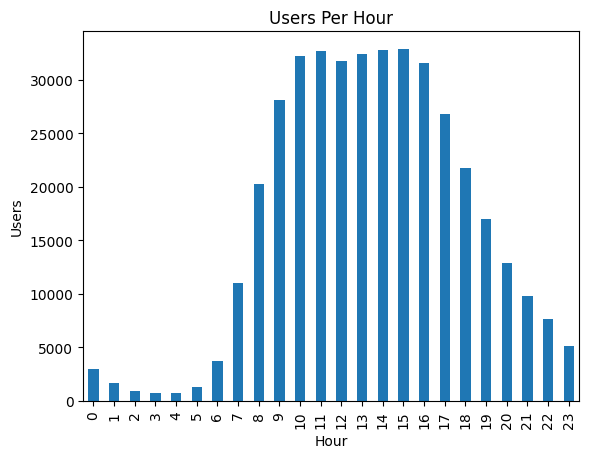

In [37]:
users_per_hour = (
    orders.groupby("order_hour_of_day")["user_id"]
    .nunique()
    .reset_index(name="unique_users")
    .sort_values("order_hour_of_day")
)
users_per_hour.plot(x='order_hour_of_day', 
                    y ='unique_users' , 
                    kind = 'bar', 
                    title = 'Users Per Hour',
                    xlabel = 'Hour', 
                    ylabel = 'Users',
                    legend = False);

plt.show()

En la madrugada la actividad es minima. Tiene un crecimiento muy marcado entre las 7 y las 9 am con un valor pico al rededor de las 3:00 pm. Luego comienza a disminuir gradualmente por la tarde.

### [A3] ¿Qué día de la semana compran víveres las personas?

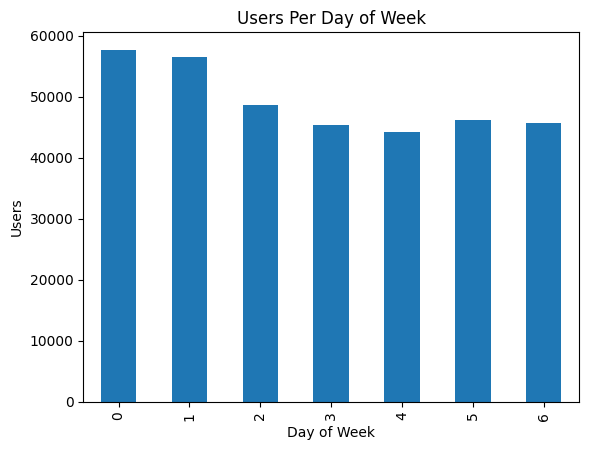

In [38]:
users_per_dow = (
    orders.groupby("order_dow")["user_id"]
    .nunique()
    .reset_index(name="unique_users")
    .sort_values("order_dow")
)
users_per_dow.plot(x='order_dow', 
                    y ='unique_users' , 
                    kind = 'bar', 
                    title = 'Users Per Day of Week',
                    xlabel = 'Day of Week', 
                    ylabel = 'Users',
                    legend = False);

plt.show()


Podemos observar que claramente el día que mas personas utilizan para hacer sus compras es el Domingo, seguido muy de cerca por los Lunes. Lo cual tiene sentido si consideramos que tradicionalmente el Domingo es el día de descanso para la mayoría de los trabajos tradicionales. 

Esto sugiere que Domingo y Lunes son días clave para lanzamiento de promociones o productos nuevos por ejemplo.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

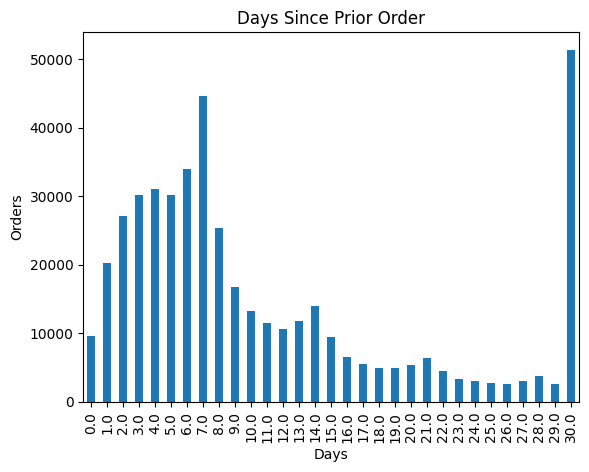

In [39]:
days_since_order = (
    orders.groupby('days_since_prior_order')["order_id"]
    .nunique()
    .reset_index(name="unique_users")
    .sort_values('days_since_prior_order')
)
days_since_order.plot(x='days_since_prior_order', 
                    y ='unique_users' , 
                    kind = 'bar', 
                    title = 'Days Since Prior Order',
                    xlabel = 'Days', 
                    ylabel = 'Orders',
                    legend = False);

plt.show()


La grafica muestra un comportamiento interesante. Al parecer las personas tienen ciclos de compra semanales como lo muestran los picos cada 7 días (lo que además es concistente con la grafica anterior que consideraba los días de la semana) aunque se van reduciendo gradualmente conforme transcurre el mes hasta llegar a un pico al final del mismo. Lo cual sugiere que además de un ciclo de compra semanal tambien existe uno mensual que además coincide con el pico mas grande. 

Esto sugiere que las personas hacen la mayor parte de sus compras una vez al mes y se van resurtiendo semanalmente conforme a sus necesidades de consumo mas cotidianas. Infiero que los productos que se compran de manera mas regular son los de mas rapido consumo o los que menor periodo de caducidad tienen. 

Por lo que podemos concluir que los primeros y ultimos días del mes tambien son criticos para optimizar las ventas.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# Filtrado de datos para Miercoles
orders_wed = orders[orders['order_dow'] == 3]
hours_wed = orders_wed['order_hour_of_day']
wed_count = hours_wed.value_counts().sort_index()

In [41]:
# Filtrado de datos para Sabado
orders_sat = orders[orders['order_dow'] == 6]
hours_sat = orders_sat['order_hour_of_day']
sat_count = hours_sat.value_counts().sort_index()

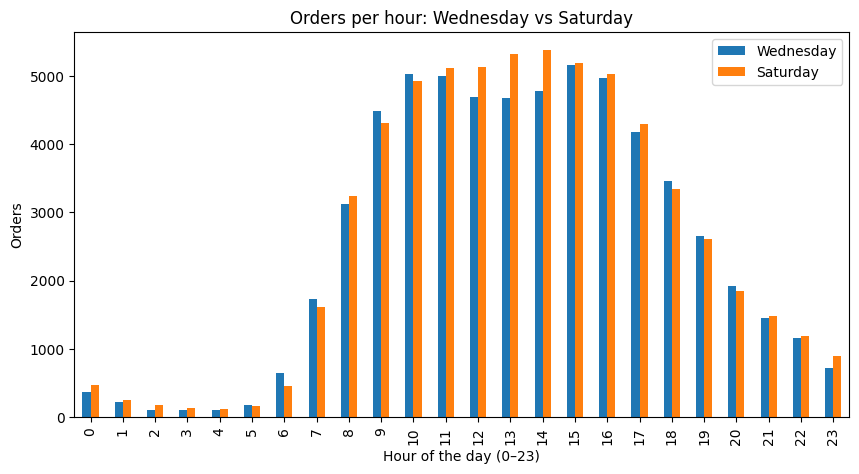

In [42]:
counts = pd.DataFrame({
    "Wednesday": wed_count,
    "Saturday": sat_count
})

# Barras agrupadas
graph = counts.plot(
    kind="bar",
    figsize=(10, 5),
    title="Orders per hour: Wednesday vs Saturday",
    xlabel="Hour of the day (0–23)",
    ylabel="Orders",
    legend=True
)

plt.show()

El sábado tiene un patrón más concentrado al mediodía, mientras que el miércoles reparte más entre media mañana y media tarde. Aunque en general parece que la distribución general es bastante similar. El total de ordenes durante el día consistentemente tambien es bastante similar.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
clients = orders.groupby('user_id')['order_id'].count()
clients_orders = clients.value_counts().sort_index()

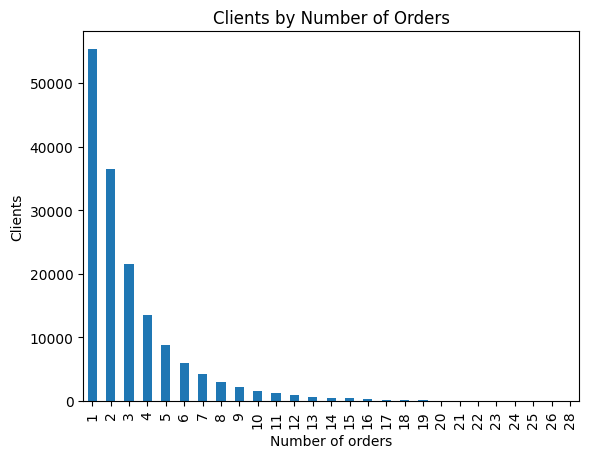

In [44]:
clients_orders.plot(kind = 'bar', 
                    title = 'Clients by Number of Orders',
                    xlabel = 'Number of orders', 
                    ylabel = 'Clients',
                    legend = False);

plt.show()

Podemos observar claramente una distribución de cola larga. Esto significa que:
-La mayoría de clientes hacen solo 1-2 pedidos
-Pocos clientes hacen muchos pedidos
.Hay una "cola" de clientes muy activos que representan una pequeña proporción

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
order_products_count = order_products.groupby('product_id').size()
products_orders = order_products_count.sort_values(ascending=False)
top_20_products = products_orders.head(20)
top_20_df = top_20_products.reset_index()
top_20_df.columns = ['product_id', 'order_count']
top_20_with_names = top_20_df.merge(products[['product_id', 'product_name']], 
                                   on='product_id', 
                                   how='left')

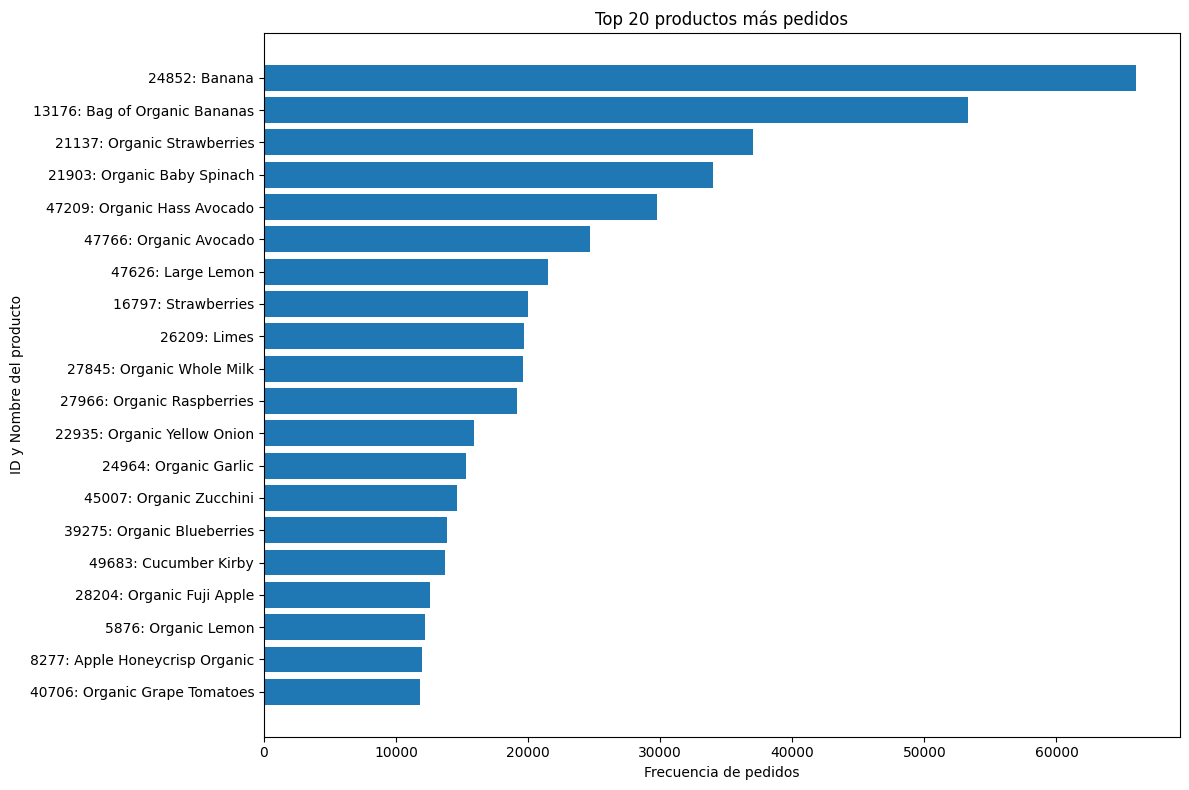

In [46]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_20_with_names)), top_20_with_names['order_count'])
plt.yticks(range(len(top_20_with_names)), top_20_with_names['product_id'].astype(str) + ': ' + top_20_with_names['product_name'])
plt.xlabel('Frecuencia de pedidos')
plt.ylabel('ID y Nombre del producto')
plt.title('Top 20 productos más pedidos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Podemos observar que los productos mas vendidos son casi en su totalidad 'staples' (frescos). Esto nos dice que hay que son productos cuyo abasto en el inventario debe ser prioritario. debido a sus caracteristicas especiales: 
-Alta rotación
-Demanda constante
-Perecederos (requieren gestión cuidadosa)
-Son la base de las compras de los clientes

Podríamos usar estos productos para impulsar la venta de otros mediante promociones tipo "en la compra de x llevate y al 50% de descuento"

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:
orders_by_client = order_products.groupby('order_id').size()
orders_stats = orders_by_client.agg(['mean', 'min', 'max'])
prod_mean_order = orders_by_client.mean().round(2)
print(f'Los clientes piden en promedio {prod_mean_order} productos en cada pedido.')

Los clientes piden en promedio 10.1 productos en cada pedido.


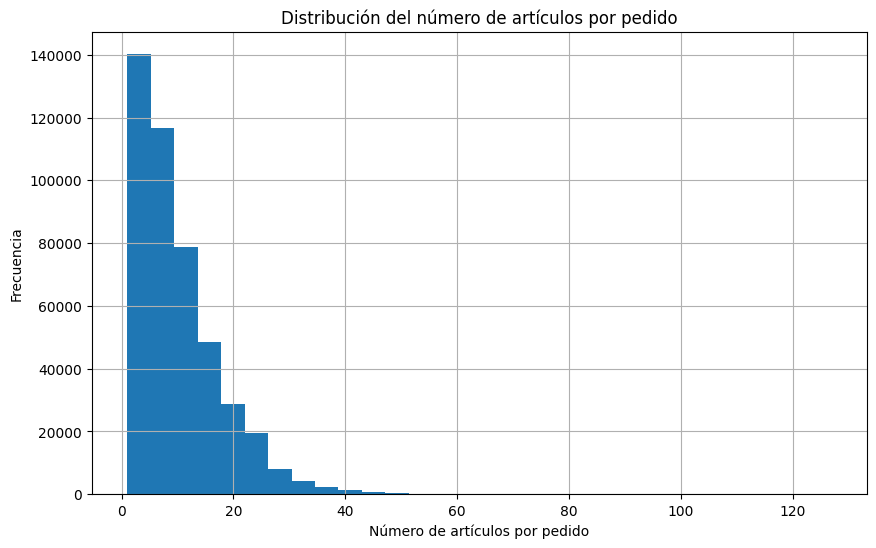

In [48]:
orders_by_client.hist(bins=30, figsize=(10, 6))
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.show()

Observamos que la mayoría de los pedidos tienen pocos artículos. La mayor parte de ellos no tiene mas de 20 productos y hay muy pocos pedidos con muchísimos ítems. Es un comportamiento que hace mucho sentido si pensamos que la mayor parte de los usuarios seguramente son personas que hacen sus compras cotidianas y habrá unos cuantos que hagan pedidos para resurtir negocios o comedores industriales, etc... que corresponderian a los pedidos mas grandes.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
products_reordered = order_products[order_products['reordered'] == 1]

products_reordered_id = products_reordered['product_id'].value_counts()

top_20_products_reordered_df = (
    products_reordered_id.head(20)
    .rename_axis('product_id')           # el índice pasa a columna
    .reset_index(name='reorder_count')   # valores -> 'reorder_count'
)

top_20_products_reordered_with_names = top_20_products_reordered_df.merge(
    products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

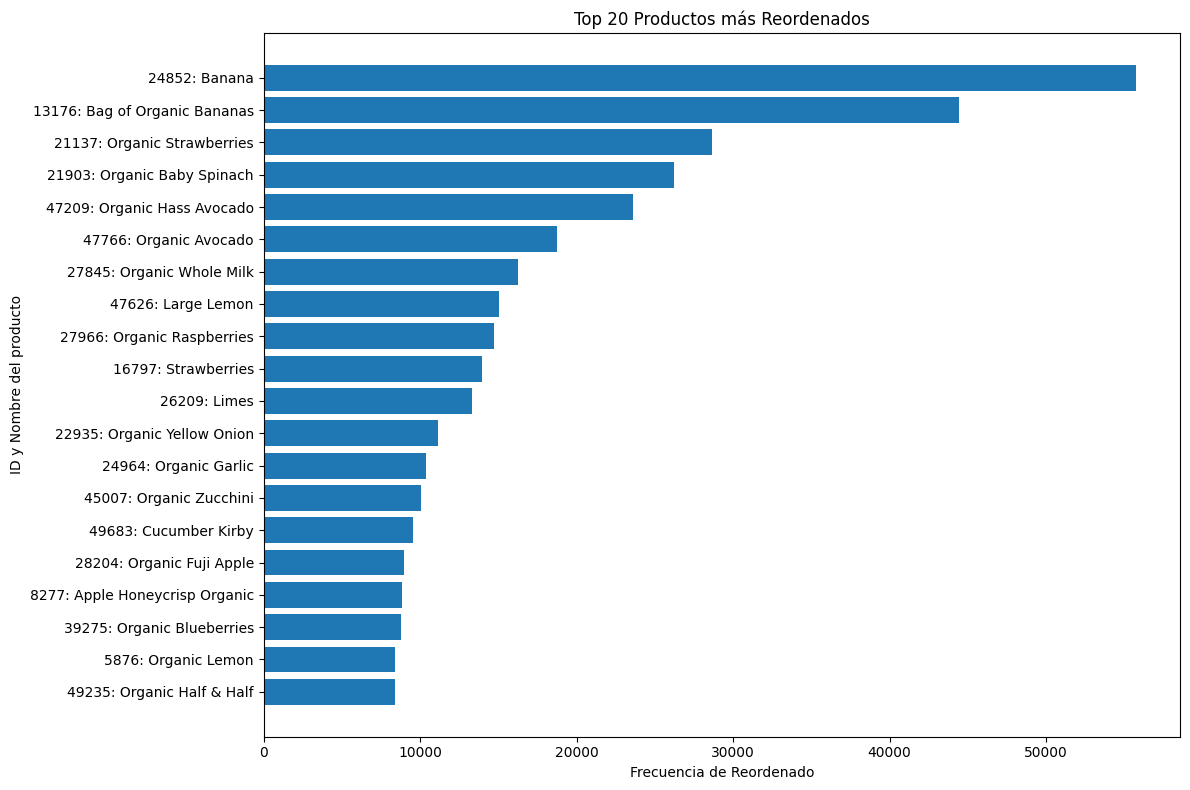

In [50]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_20_products_reordered_with_names)), top_20_products_reordered_with_names['reorder_count'])
plt.yticks(range(len(top_20_products_reordered_with_names)), top_20_products_reordered_with_names['product_id'].astype(str) + ': ' + top_20_products_reordered_with_names['product_name'])
plt.xlabel('Frecuencia de Reordenado')
plt.ylabel('ID y Nombre del producto')
plt.title('Top 20 Productos más Reordenados')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [51]:
print(top_20_products_reordered_with_names[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

Esta grafica nos muestra algo muy parecido a la de los productos mas populares. Hay una fuerte preferencia de los clientes a reordenar productos de la categoría de basicos perecederos y organicos. Esto nos termina de confirmar la importancia crucial del reabastecimiento de este tipo de productos. Especialmente Bananas que es por mucho el producto mas popular y tambien el de mayor rotación. 

Es importante analizar tambien de que manera se pueden impulsar las ventas de mas productos para no depender tanto de tan pocos productos. Quizás sea un problema de desconocimiento de la gente en cuyo caso habría que hacer activaciones que involucren otros productos o cambiarlos por otros que generen mayor demanda y de esta manera diversificar las ventas para fortalecer Instacart ante un posible desabasto de los productos de los que claramente depende.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [52]:
reorders = order_products[order_products['reordered'] == 1].groupby('product_id').size()
total_compras = order_products.groupby('product_id').size()
reorder_prop = reorders.div(total_compras, fill_value=0)

reorder_df = reorder_prop.reset_index()
reorder_df.columns = ['product_id', 'reorder_proportion']

result = products.merge(reorder_df, on='product_id', how='inner')
result.head()

,product_id,product_name,aisle_id,department_id,reorder_proportion
0,1,Chocolate Sandwich Cookies,61,19,0.564286
1,2,All-Seasons Salt,104,13,0.000000
2,3,Robust Golden Unsweetened Oolong Tea,94,7,0.738095
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,0.510204
4,7,Pure Coconut Water With Orange,98,7,0.500000


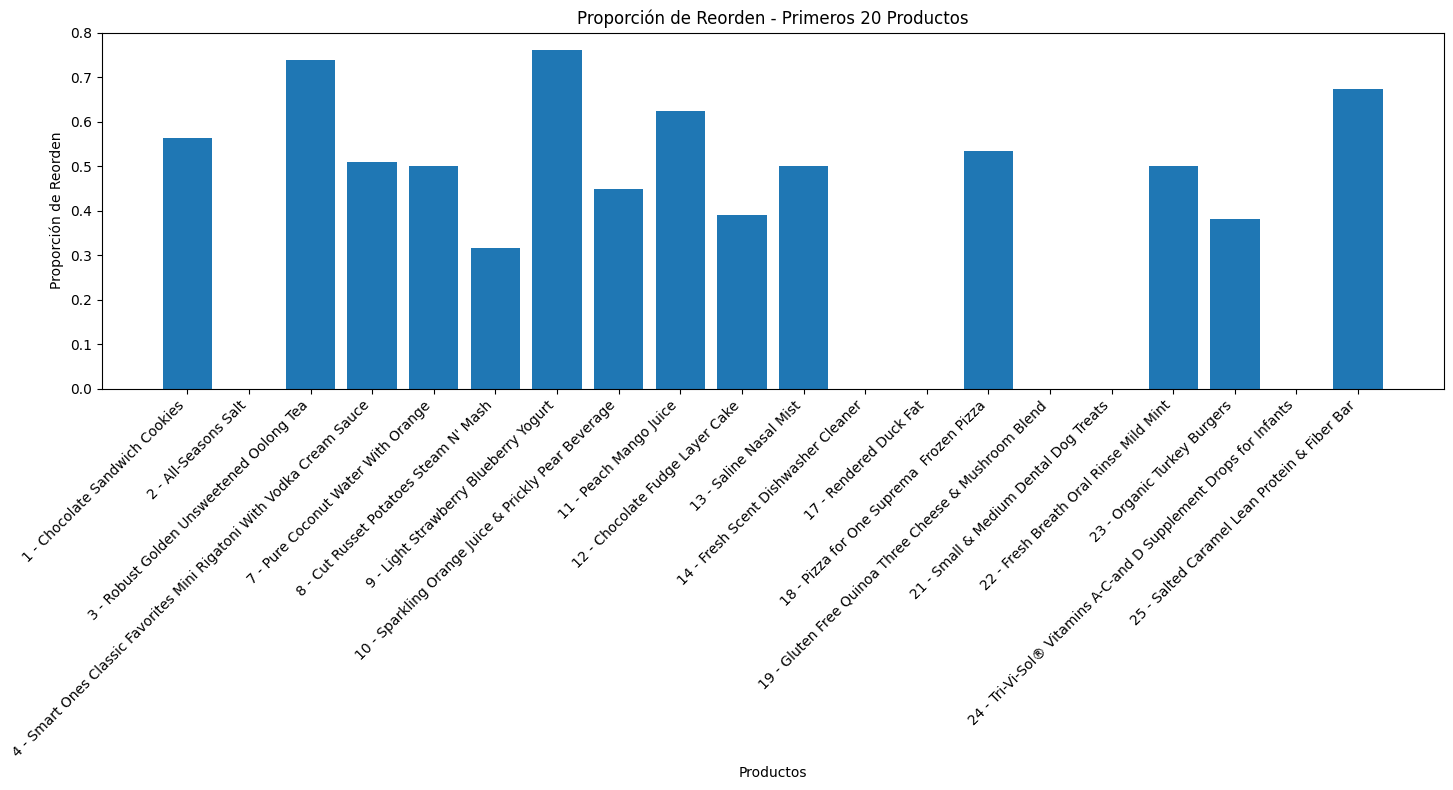

In [53]:
top_20 = result.head(20)

plt.figure(figsize=(15, 8))
plt.bar(range(len(top_20)), top_20['reorder_proportion'])
plt.xlabel('Productos')
plt.ylabel('Proporción de Reorden')
plt.title('Proporción de Reorden - Primeros 20 Productos')

labels = top_20['product_id'].astype(str) + ' - ' + top_20['product_name']
plt.xticks(range(len(top_20)), labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Mostrar la proporción de de las veces que se pide y que se vuelve a pedir cada producto sería imposible debido al numero total de productos que tenemos (49,694) por esto decidí crear una grafica donde se muestren simplemente los primeros 20.

Sin embargo si podemos observar que los productos con mayor tasa de recompra corresponden a productos basicos mientras que los de menor tasa de recompra corresponden a productos que suelen ser antojos ocasionales.

Quizás valdría la pena hacer el mismo analisis pero acotarlo por departamentos o incluso pasillos para obtener información mas util.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
merged = orders.merge(order_products, on="order_id", how="left", validate="one_to_many", indicator=True)
merged_clean = merged[merged['_merge'] == 'both']
merged_clean_reordered = merged_clean[merged_clean['reordered']==1]
total_reorders_per_client = merged_clean.groupby('user_id')['reordered'].sum()
total_orders_per_client = merged_clean.groupby('user_id')['product_id'].count()
client_reorder_prop = total_reorders_per_client/total_orders_per_client
client_reorder_prop.head()

user_id
2    0.038462
4    0.000000
5    0.666667
6    0.000000
7    0.928571
dtype: float64

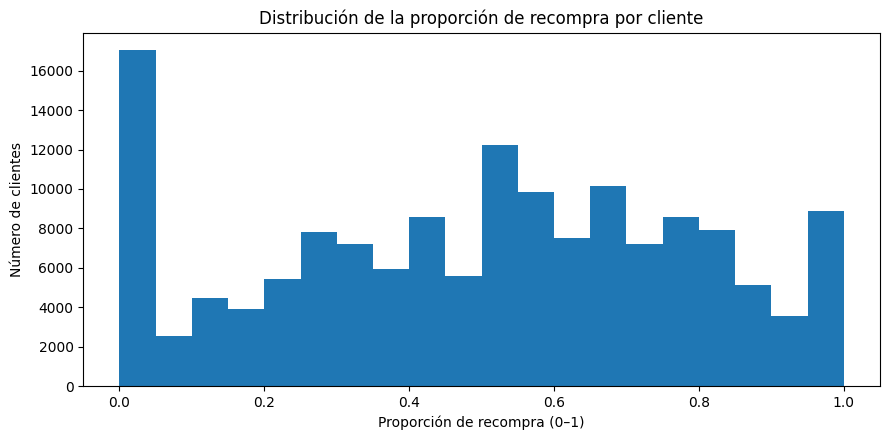

In [55]:
plt.figure(figsize=(9, 4.5))
client_reorder_prop.plot(kind="hist", bins=20)
plt.title("Distribución de la proporción de recompra por cliente")
plt.xlabel("Proporción de recompra (0–1)")
plt.ylabel("Número de clientes")
plt.tight_layout()
plt.show()

Analizando esta metrica podemos observar que aproximadamente el 40% de los productos que los clientes tienen en sus pedidos corresponden a productos que ya habían pedido antes. 

Para incentivar la recompra, debemos enfocar los esfuerzos en clientes con bajo historial.

Tambien podemos ver que los clientes con mayor proporción de recompra tienden a ser tambien los que mas compran en general. Es decir, "si pruebas mas, conoces mas y por lo tanto recompras mas".

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [56]:
first_items = order_products.loc[order_products["add_to_cart_order"] == 1]

first_counts = (first_items
                .groupby("product_id")
                .size()
                .sort_values(ascending=False)
                .head(20)
                .rename("first_added_count")
                .reset_index())

top20_first = first_counts.merge(
    products[["product_id", "product_name"]],
    on="product_id",
    how="left"
)

top20_first = top20_first.sort_values("first_added_count", ascending=False)

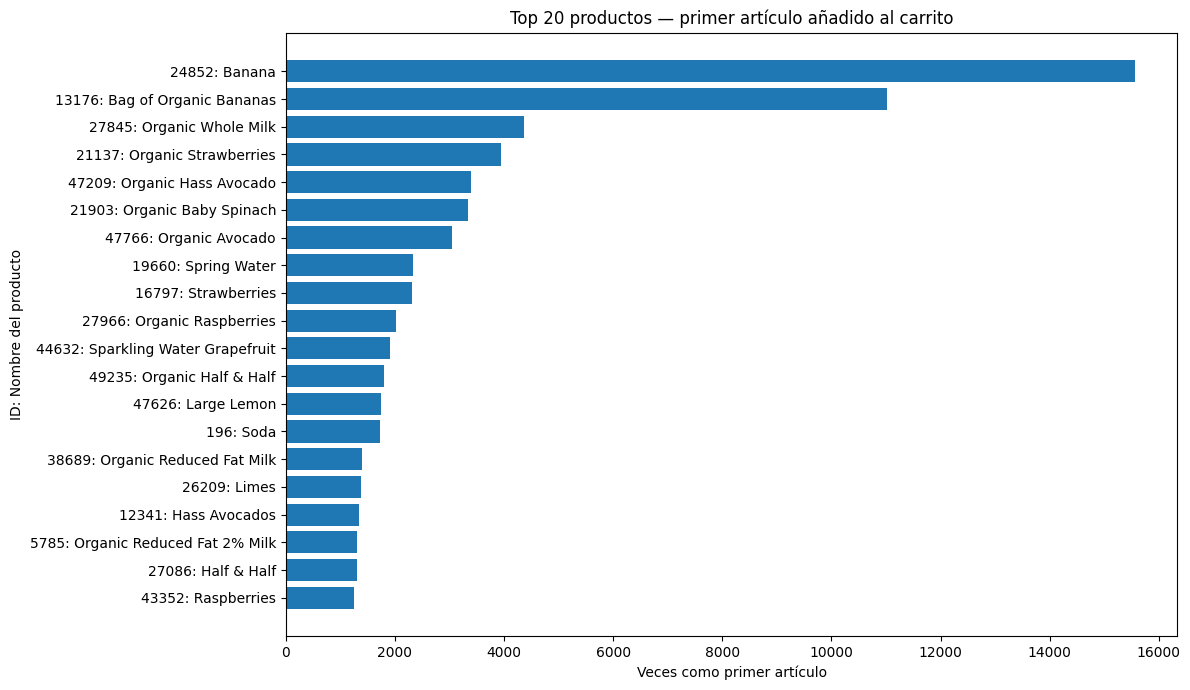

In [57]:
plt.figure(figsize=(12, 7))
plt.barh(range(len(top20_first)), top20_first["first_added_count"])

ylabels = (top20_first["product_id"].astype(str) + ": " + top20_first["product_name"])
plt.yticks(range(len(top20_first)), ylabels)

plt.gca().invert_yaxis()
plt.xlabel("Veces como primer artículo")
plt.ylabel("ID: Nombre del producto")
plt.title("Top 20 productos — primer artículo añadido al carrito")

plt.tight_layout()
plt.show()

Esta grafica nos dice que la gente prioriza en cuanto al orden en que agrega sus productos de acuerdo a los productos que compra recurrentemente y volvemos a caer en la misma categoría de frescos, perecerderos y organicos. 

Este tipo de productos son los que deberiamos poner en un apartado de agregado rapido o crear listas precargadas que los incluyan.

### Conclusion general del proyecto:

Este conjunto de datos nos muestra varios patrones en cuanto a comportamientos de los clientes que tienen que ver con sus horarios, dias preferidos de compra y sus productos favoritos.

La gente casi no compra de madrugada y se activa fuerte hacia la tarde, con un pico al rededor de las 3 pm.

Por días, el domingo es el rey en participación y, cuando comparas miércoles vs. sábado, el sábado concentra más al mediodía mientras el miércoles empuja hacia media tarde. 

Los carritos de compra son, en su mayoría, chicos a medianos: muchísimos pedidos incluyen pocos artículos y solo unos cuantos compran al mayoreo, así que lo habitual es la reposición rápida. 

En tiempos de recompra, la espera cae entre 0 y 30 días y se notan ciclos semanales (7, 14, 21…), lo que encaja con rutinas del súper.

A nivel cliente, más o menos la mitad de lo que agregan ya lo habían pedido antes, y mientras más compran, más se les vuelve hábito. También aparecen productos “ancla” que impulsan todo: bananas, berries, espinaca, aguacate y leche dominan tanto en reorden como en ser el primer artículo del carrito; son los que conviene tener bien visibles, con promociones. 

Finalmente; aunque el top concentra mucho, hay una cola larga enorme de productos que, sumados, sostienen variedad y nichos.